<a href="https://colab.research.google.com/github/jerge/DAT405-DSC/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download Some Data Related to GDP per capita and life expectancy


### Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p]

We decided that we only wanted to use data from one year, since subsequent years would be similar and we did not want to clutter the plot. Furthermore we assumed that each country would have a similar GDP / Life expectancy ratio and thus it would be sufficient to plot only one point per country to see a trend (since we had many countries data). 

Plotting the same country multiple times could make it hard to compare them to each other, which seemed to be useful in order to answer the later questions.

We chose 2015, since we had the most data from that year.

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
ALB,Albania,2015,32826175488,10970.452245,78.025
DZA,Algeria,2015,481546174464,13724.723853,76.090
AGO,Angola,2015,154071351296,6227.664689,59.398
ATG,Antigua and Barbuda,2015,943836736,20154.947488,76.483
ARG,Argentina,2015,712662646784,19116.907915,76.068
...,...,...,...,...,...
UZB,Uzbekistan,2015,283167719424,5700.236028,70.928
VNM,Vietnam,2015,511142723584,5554.858056,75.110
YEM,Yemen,2015,67136618496,2308.636584,66.085


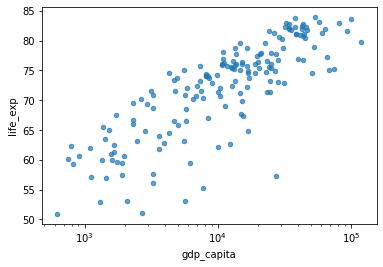

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

GdpPerCap = pd.read_csv("/content/drive/My Drive/DAT405/gdp-per-capita-worldbank.csv")
LifeExpect = pd.read_csv("/content/drive/My Drive/DAT405/life-expectancy.csv")
NatGdp = pd.read_csv("/content/drive/My Drive/DAT405/national-gdp.csv")

# Data merging & cleaning
countries = NatGdp.merge(GdpPerCap).merge(LifeExpect)
countries = countries[countries.Year == 2015]

countries = countries.set_index("Code")
countries.columns= ["country","year","gdp","gdp_capita", "life_exp"]

countries.plot.scatter(x="gdp_capita",y="life_exp",logx=True, alpha=0.7)

countries

### Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p]


The trend seems to be a logarithmic curve with a few outliers. In a richer country the life expectancy increases, which makes sense. If we assume a richer country has a higher GDP per Capita the people in that country should be able to afford all their basic needs and as such avoid starvation and health deficits related to bad food, water and hygien. Further wealth contributes to health care and medicine, but after a certain point there is a diminishing return on how much wealth impacts the life expectancy.

Almost all outliers are a result of the country being pretty poor and then finding oil, resulting in a huge boost in the economy, which has not had the time needed to positively affect the public health. Furthermore the wealth is probably not distributed properly, since the people owning oil is probably just a small percentage of the population.

### Data Cleaning and Why?
* Data from 2015
Se 1.a
* Länder som inte har data punkter för alla columner
To make a fair comparison between all the questions in #1 we figured it would require that we compared the same countries every time.
* Medelvärdes entries, ex. World fanns med
In our data there where also some points which contained averages, such as the "World" or "Africa", while these probably would have followed the trend, we decided that would not contribute properly and as such they where removed. (When we merged the plots on "Code")

###Which countries have a life expectancy higher than one standard deviation above the mean?


80.04888375800694


,country,year,gdp,gdp_capita,life_exp
Code,,,,,
AUS,Australia,2015,1066969268224,43923.258269,82.794
AUT,Austria,2015,387296296960,44304.967757,81.182
BEL,Belgium,2015,417381416960,41708.212340,80.969
CAN,Canada,2015,1518240006144,43149.475837,82.026
CYP,Cyprus,2015,23035398144,30549.100970,80.350
DNK,Denmark,2015,243726254080,45458.697149,80.475
FIN,Finland,2015,206622720000,38941.763603,81.196
FRA,France,2015,2520561483776,37766.374112,82.224
DEU,Germany,2015,3634567053312,43937.947132,80.770


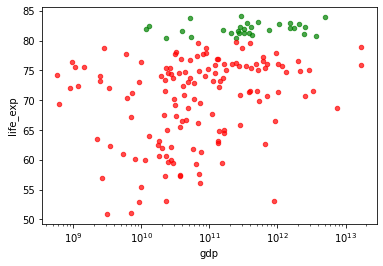

In [12]:
#d
stdevs = countries.std(axis = 0)
means = countries.mean(axis = 0)
highLifeExp = countries[countries.life_exp > stdevs.life_exp + means.life_exp]
lowLifeExp = countries[countries.life_exp <= stdevs.life_exp + means.life_exp]

fig, ax = plt.subplots()
highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7,logx=True, ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7,logx=True, ax=ax, color='r')

highLifeExp

See the green points in the plot or the list for all countries that have a life expectancy higher than one standard deviation above the mean (~80.05)

### Which countries have high life expectancy but have low GDP?

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
BRB,Barbados,2015,2807180544,16458.103529,78.801
CYP,Cyprus,2015,23035398144,30549.100970,80.350
ISL,Iceland,2015,13045315584,43048.125145,82.481
MLT,Malta,2015,11749704704,34087.081514,81.896


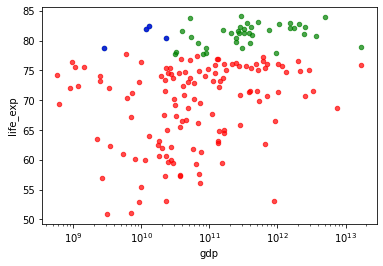

In [13]:
#e
fig, ax = plt.subplots()
highLifeExp = countries[countries.life_exp > countries.life_exp.quantile(0.75)]
lowLifeExp = countries[countries.life_exp <= countries.life_exp.quantile(0.75)]

highLifeExpLowGDP = highLifeExp[highLifeExp.gdp < countries.gdp.quantile(0.25)]
highLifeExpLowGDP #Finns inga länder som har GDP under mean och hög life exp

highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')

highLifeExpLowGDP

In our data there is a lot of deviation in the GDP's. Therefore the standard deviation of the country is higher than the mean and as such it does not make sense to indicate low GDP by "X standard deviation below the mean" since just a single step above the mean would remove all countries from the plot. This could perhaps be solved by removing the oil countries and other outliers, but because of the logarithmic nature it would not be certain and furthermore it would make the comparison unfair, since we wouldn't have all countries.

Therefore we chose to indicate the low GDP as the bottom 25% of the samples and by that it followed that high life expectancy was indicated by the top 25% of the samples. These countries where the 4 Blue ones in the plot, Barbados, Cyprus, Iceland and Malta.

#Does every strong economy (normally indicated by GDP) have high life expectancy? 

,year,gdp,gdp_capita,life_exp
count,26.0,2.600000e+01,26.000000,26.000000
mean,2015.0,1.946831e+12,17082.109539,72.320654
std,0.0,3.372143e+12,14003.001177,5.286936
min,2015.0,3.806535e+11,3132.567540,53.112000
25%,2015.0,5.481368e+11,8122.607417,70.901500
50%,2015.0,8.061658e+11,14213.657560,74.777500
75%,2015.0,1.827718e+12,20196.229710,75.895000
max,2015.0,1.677754e+13,66569.403414,77.285000


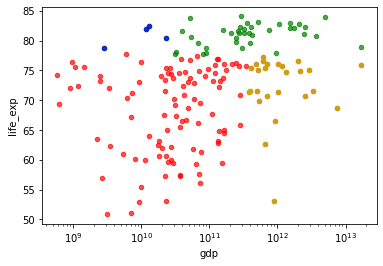

In [19]:
#e
fig, ax = plt.subplots()

lowLifeExpHighGDP = lowLifeExp[lowLifeExp.gdp >= countries.gdp.quantile(0.75)]

highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')
lowLifeExpHighGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='y')


From the above plot the yellow dots are the countries which has a strong economy, but a relatively low life expectancy. Since these are so many (26/169 ~ 15%) it would be unreasonable to say that a strong economy has a strong indication on the life expectancy.

### Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f

,year,gdp,gdp_capita,life_exp
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


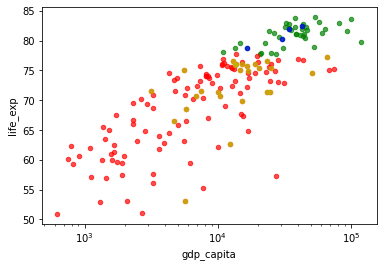

In [22]:
fig, ax = plt.subplots()

highLifeExpLowGDPcap = highLifeExp[highLifeExp.gdp_capita < countries.gdp_capita.quantile(0.25)]

highLifeExp.plot.scatter(x="gdp_capita",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')
lowLifeExpHighGDP.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='y')

highLifeExpLowGDPcap.describe()

GDP per capita is a much stronger indicator for strong economy. We can instantly see that there are no countries with a high life expectancy that has a low GDP per capita. Furthermore we see that the yellow countries from the previous plot, actually has a more reasonable GDP per capita and are much more entertwined with the other low life expectancy countries. Similarly the blue dots don't stick out as much. The reason for this is probably that GDP per capita factors in that being a smaller country doesn't result in a lower life expectancy.

# Download some other data sets, e.g. related to happiness and life satisfaction, trust, corruption, etc

### Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.

We chose to look at how big an impact a countries corruption and wealth impact life satisfaction.

First of all we wanted to check how money contributes to corruption, and one of the first things we thought of there was that the economic inequality probably was an indicator, since poorly distributed wealth should indicate that the country has less democracy, and furthermore we could see the relation between GDP per capita and economic inequality.

See if a country that had low economic inequality and corruption, will it be a happy country? Will the population be more satisfied with their lives? -> Life satisfaction.

“Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?


"Income equality and corruption?" Does one indicate the other? (top right corner)

"Corruption and income equality vs Life satisfaction?" Does a more just country indicate better lives for their citizens? (Bara för de bästa länderna)

"GDP per capita and equal income (RiP oljeländer) vs Life satisfaction" Does more money in a citizens life indicate a high life satisfaction

___________________________________________

Data manipulation, Skalor, Normalisera och adera *300, varför axlar . Varför -corruption

2012, 76 länder (income ineq har få länder)

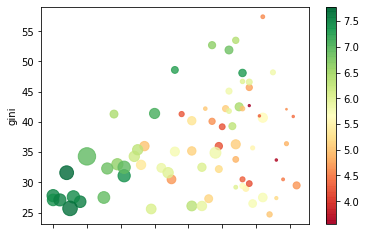

In [8]:
from sklearn import preprocessing

incomeInEq = pd.read_csv("/content/drive/My Drive/DAT405/economic-inequality-gini-index.csv")
corruption = pd.read_csv("/content/drive/My Drive/DAT405/TI-corruption-perception-index.csv")
gdpCap = pd.read_csv("/content/drive/My Drive/DAT405/gdp-per-capita-worldbank.csv")
satisfaction = pd.read_csv("/content/drive/My Drive/DAT405/happiness-cantril-ladder.csv")

# Merge, data cleaning, set index
countries = incomeInEq.merge(corruption).merge(gdpCap).merge(satisfaction).set_index("Code")
countries.columns= ["country","year","gini","corruption","gdp_capita","satisfaction"]

# Data cleaning, choose year 2012
countries = countries[countries.year == 2012]

# Normalize GDP per capita
min_max_scaler = preprocessing.MinMaxScaler()
x = countries[['gdp_capita']].values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
# Increase to more readable values
countries.gdp_capita = (x_scaled+0.01)*300
# Flip the corruption to have high corruption be to the right
countries.corruption = -countries.corruption

countries.plot.scatter(x="corruption", y="gini", s=countries.gdp_capita,c=countries.satisfaction,cmap="RdYlGn", alpha=0.8)

### Discuss any observations that you make, or insights obtained, from the data visualisations.

Svara på ovanstående frågor